<a href="https://colab.research.google.com/github/xh313/TidyTuesdayWithPython/blob/main/TidyTuesday29032022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Run from here after first time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import matplotlib.pylab as pl
import math
from collections import Counter
import csv
import matplotlib as mpl
import seaborn as sns

In [89]:
all = pd.read_csv('https://raw.githubusercontent.com/rfordatascience\
/tidytuesday/master/data/2022/2022-03-29/sports.csv', low_memory=False)

all['gender'] = all['sum_partic_men'] > all['sum_partic_women']

list_sports = ['Basketball', 'Football', 'Golf', 'Baseball', 
               'Volleyball', 'Swimming', 'Wrestling', 'Softball']

df = all[all.sports.isin(list_sports) & (all['total_exp_menwomen'] < 1000000)\
         & (all['total_exp_menwomen'] > 100000)]  # Filter out abnormal data
df.describe()

,year,unitid,zip_text,classification_code,ef_male_count,ef_female_count,ef_total_count,sector_cd,sportscode,partic_men,...,partic_coed_men,partic_coed_women,sum_partic_men,sum_partic_women,rev_men,rev_women,total_rev_menwomen,exp_men,exp_women,total_exp_menwomen
count,30535.000000,30535.000000,3.050700e+04,30535.000000,30535.000000,30535.000000,30535.000000,30535.000000,30535.000000,19844.000000,...,0.0,0.0,30535.000000,30535.000000,1.984400e+04,2.090400e+04,3.053500e+04,19844.000000,20904.000000,30535.000000
mean,2017.009170,183153.928476,6.151950e+07,7.337416,1616.054560,1972.100835,3588.155395,2.179532,11.194334,30.791373,...,NaN,NaN,20.010611,11.060062,2.835943e+05,2.551100e+05,3.589476e+05,278618.552056,253752.817403,354784.851547
std,1.408475,56986.722425,1.873143e+08,3.987694,1923.261546,2288.410532,4153.982485,3.103907,9.757280,26.348312,...,NaN,NaN,25.824316,9.135903,2.097301e+05,1.889236e+05,2.335386e+05,200018.096784,187098.457932,226116.131079
min,2015.000000,100654.000000,6.810000e+02,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,NaN,NaN,0.000000,0.000000,1.253000e+03,1.177000e+03,1.177000e+03,12950.000000,13623.000000,100001.000000
25%,2016.000000,148496.000000,2.963900e+04,4.000000,514.000000,629.000000,1173.000000,1.000000,2.000000,14.000000,...,NaN,NaN,0.000000,0.000000,1.320480e+05,1.226078e+05,1.735285e+05,129725.500000,120893.500000,171083.000000
50%,2017.000000,179043.000000,5.320200e+04,6.000000,894.000000,1139.000000,2062.000000,2.000000,8.000000,22.000000,...,NaN,NaN,14.000000,13.000000,2.167260e+05,1.957325e+05,2.893730e+05,213711.000000,193643.000000,286411.000000
75%,2018.000000,213598.000000,8.105000e+04,10.000000,1951.500000,2443.000000,4389.500000,2.000000,16.000000,36.000000,...,NaN,NaN,30.000000,18.000000,3.862922e+05,3.349522e+05,4.827165e+05,382003.250000,332744.750000,479724.500000
max,2019.000000,800001.000000,9.977575e+08,20.000000,17376.000000,25361.000000,36401.000000,99.000000,28.000000,251.000000,...,NaN,NaN,251.000000,121.000000,3.460784e+06,4.064427e+06,4.064427e+06,999899.000000,999948.000000,999948.000000


In [85]:
# Using pandas methods and slicing to determine the order by decreasing median
my_order = df.groupby(by=["sports"])["total_exp_menwomen"].median().iloc[::-1].index

In [ ]:
# Version using plotly

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Violin(x=df['sports'][df['sum_partic_men'] < df['sum_partic_women']],
                        y=df['total_exp_menwomen'][df['sum_partic_men'] < df['sum_partic_women']],
                        legendgroup='Women Dominated', scalegroup='Women Dominated', name='Women Dominated',
                        side='negative', marker=None, points=None,
                        line_color='royalblue')
             )
fig.add_trace(go.Violin(x=df['sports'][df['sum_partic_men'] >= df['sum_partic_women']],
                        y=df['total_exp_menwomen'][df['sum_partic_men'] >= df['sum_partic_women']],
                        legendgroup='Men Dominated', scalegroup='Men Dominated', name='Men Dominated',
                        side='positive', marker=None, points=None,
                        line_color='lightseagreen')
             )
fig.update_traces(meanline_visible=True,)
fig.update_layout(violingap=0, violinmode='overlay',
                  title_text='Annual expenditure in Men- vs Women-Dominated Collegiate Sports', 
                  #showlegend=False
                  )
fig.show()

![ncaafunds](https://user-images.githubusercontent.com/77285010/160757774-009472e4-ab94-4876-93d4-a698e16894c4.png)

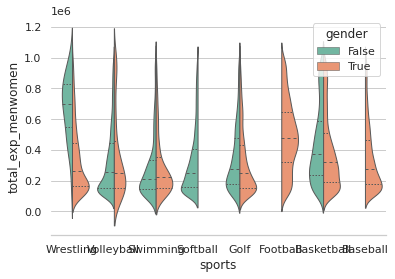

In [90]:
# Normal seaborn plot
sns.set_theme(style="whitegrid")

ax = sns.violinplot(data=df, x="sports", y="total_exp_menwomen", hue="gender",
               split=True, inner="quart", linewidth=1, order=my_order,
               palette='Set2')

sns.despine(left=True)

plt.show()

In [103]:
fig.write_html("ncaafunds.html")